# Predicting House Sale Prices
## Introduction
In this project, we'll be working with a housing data set (real original, I know, but it's good practice and used often for a reason) for the city of Ames, Iowa from 2006-2010. We'll try to predict housing sale prices based on this dataset using linear regression machine learning algorithms.

The workflow that we will try to produce will involve functions that follow this pipeline:
* train set
* transform features
* select features
* train and test
* mse and rmse values

Let's get started by setting up our environment.

## The Basics
First we'll get our necessary set-up going, and create some basic functions for now that do the bare minimum. We'll go back and update this function to do the full amount of work as the project goes on, and by the time anyone is reading this, they should be in their final form.

Note: the variable below will be changed to 'true' when all functions are finished and do not need any code added to them.

In [1]:
# housekeeping variable for functions - originally false
updated = True
updated

True

In [2]:
# get all necessary mods and set columns to avoid truncating
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

# read into a df
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")

# have a look
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
# transforming features function - originally just returns df
def transform_features(df):
    return df

In [4]:
# select features function - originally just 'Gr Liv Area' and 'SalePrice' columns
def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

In [5]:
# train and test function - originally just selects rows for train and test dfs, trains using numerical columns from select fcn, and gets rmse
def train_and_test(df):
    # allocate rows to train and test
    train = df[:1460]
    test = df[1460:]
    
    # select only numeric (integer, float) columns to use using dtypes
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    # drop price from features since we want to predict it
    features = numeric_train.columns.drop("SalePrice")
    
    # create linear regression model and test it
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    
    # get mse and rmse values and return rmse
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [6]:
# test the data on the basic functions so far
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

# display rmse after first rendition of functions
rmse

57088.25161263909

We see that with our very basic model so far we returned a starting rmse value to work with, though we can do much better since this ultimately only took in 1 feature (Gr Liv Area) originally and did nothing else.

## Feature Engineering
Now we can look for more features to add, but first we need to make them useful in the df columns. There are three main things we're looking to do:
* remove features we don't want (either data leakage or >25% missing values)
* transform features into a proper format that we do want to use (scaling, filling in values, etc.)
* create new features by combining other features

In order to see how much of each of the three we'll be doing, we have to explore the data a little bit more. Eventually, this information will be used to update the transform_features() function above.

In [7]:
# see which columns have nulls
df_nulls = df.isnull().sum()
df_nulls

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

In [8]:
# see which columns have over 25% nulls
df_nulls_cols = df_nulls[df_nulls > (len(df)/4)].sort_values()
df_nulls_cols

Fireplace Qu    1422
Fence           2358
Alley           2732
Misc Feature    2824
Pool QC         2917
dtype: int64

In [9]:
# drop these columns
df = df.drop(df_nulls_cols.index, axis=1)

# confirm the drop
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


For now, we'll also remove any text columns that contain missing values. There's no "average" text to replace the rows like in numerical columns, so it's a bit harder to do - and with this many columns it shouldn't be a problem.

In [10]:
# see which text columns have missing values
text_null = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
text_null

Garage Cond       159
Garage Qual       159
Garage Finish     159
Garage Type       157
Bsmt Exposure      83
BsmtFin Type 2     81
Bsmt Cond          80
Bsmt Qual          80
BsmtFin Type 1     80
Mas Vnr Type       23
Electrical          1
Sale Condition      0
Bldg Type           0
Condition 2         0
Condition 1         0
Neighborhood        0
Land Slope          0
Roof Style          0
Lot Config          0
Utilities           0
Land Contour        0
Lot Shape           0
Street              0
House Style         0
Exter Cond          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Exter Qual          0
Sale Type           0
Foundation          0
Heating             0
Heating QC          0
Central Air         0
Kitchen Qual        0
Functional          0
Paved Drive         0
MS Zoning           0
dtype: int64

In [11]:
# get only the columns >0 value
df_nulls_2 = text_null[text_null > 0]
df_nulls_2

Garage Cond       159
Garage Qual       159
Garage Finish     159
Garage Type       157
Bsmt Exposure      83
BsmtFin Type 2     81
Bsmt Cond          80
Bsmt Qual          80
BsmtFin Type 1     80
Mas Vnr Type       23
Electrical          1
dtype: int64

In [12]:
# drop these columns
df = df.drop(df_nulls_2.index, axis=1)

# confirm the drop 
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,0.0,441.0,1080.0,GasA,Fa,Y,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,1960.0,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1961.0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,0.0,406.0,1329.0,GasA,TA,Y,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1958.0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,0.0,1045.0,2110.0,GasA,Ex,Y,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,1968.0,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,0.0,137.0,928.0,GasA,Gd,Y,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,1997.0,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


Now we can focus on the numerical columns and their fill-ins. We'll use the most common value for that column in the missing rows (mean might not work for discrete values).

In [13]:
# see which numerical columns have missing values
num_null = df.select_dtypes(include=['int', 'float']).isnull().sum()
num_null

Order                0
PID                  0
MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [14]:
# get the 'fixable' columns only
fix_num = num_null[(num_null < len(df)/4) & (num_null > 0)].sort_values()
fix_num

BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Garage Cars         1
Garage Area         1
Bsmt Full Bath      2
Bsmt Half Bath      2
Mas Vnr Area       23
Garage Yr Blt     159
Lot Frontage      490
dtype: int64

In [15]:
# get the most common value for these
replacements = df[fix_num.index].mode().to_dict(orient='records')[0]
replacements

{'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Garage Yr Blt': 2005.0,
 'Lot Frontage': 60.0,
 'Mas Vnr Area': 0.0,
 'Total Bsmt SF': 0.0}

In [16]:
# now replace the original df
df = df.fillna(replacements)

# verify the nulls (should only be 0)
df.isnull().sum().value_counts()

0    66
dtype: int64

With the missing values taken care of (first two bullet points), we can now look at the df as a whole to see which new features we can make from other features that better capture the data. Looking at all of the different columns involving years, this seems like a good place to start.

In [17]:
# make years since sold into a 0 oriented timeline and display negative values
years_sold = df['Yr Sold'] - df['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [18]:
# make years since remod into a 0 oriented timeline and display negative values
years_remod = df['Yr Sold'] - df['Year Remod/Add']
years_remod[years_sold < 0]

2180   -2
dtype: int64

In [19]:
# create new columns from these
df["Years Before Sale"] = years_sold
df["Years Since Remod"] = years_remod

# drop these rows (don't make sense)
df = df.drop([1702,2180,2181], axis=0)

# drop the original columns since we don't need anymore
df = df.drop(["Year Built", "Year Remod/Add"], axis=1)

# confirm all changes
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Years Before Sale,Years Since Remod
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,0.0,441.0,1080.0,GasA,Fa,Y,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,1960.0,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000,50,50
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1961.0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000,49,49
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,0.0,406.0,1329.0,GasA,TA,Y,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1958.0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000,52,52
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,0.0,1045.0,2110.0,GasA,Ex,Y,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,1968.0,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000,42,42
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,0.0,137.0,928.0,GasA,Gd,Y,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,1997.0,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900,13,12


Finally, we can drop columns that don't really have any useful information or have data leakage. Data leakage includes data about the final sale, which we don't want. More data about each column: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [20]:
# drop not useful columns
df = df.drop(['PID', 'Order'], axis=1)

# drop leakage columns
df = df.drop(['Mo Sold', 'Sale Condition', 'Sale Type', 'Yr Sold'], axis=1)

# confirm the drops
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,0.0,441.0,1080.0,GasA,Fa,Y,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,1960.0,2.0,528.0,P,210,62,0,0,0,0,0,215000,50,50
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1961.0,1.0,730.0,Y,140,0,0,0,120,0,0,105000,49,49
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,0.0,406.0,1329.0,GasA,TA,Y,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1958.0,1.0,312.0,Y,393,36,0,0,0,0,12500,172000,52,52
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,0.0,1045.0,2110.0,GasA,Ex,Y,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,1968.0,2.0,522.0,Y,0,0,0,0,0,0,0,244000,42,42
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,0.0,137.0,928.0,GasA,Gd,Y,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,1997.0,2.0,482.0,Y,212,34,0,0,0,0,0,189900,13,12


We can actually go ahead and redo our transform_features() function now. It is simply our code above put into the function. In order to have better readability, we'll actually reproduce the function below. It shouldn't cause any problems in the overall script, with the exception of just reading in the df again.

In [21]:
# read in original df - this avoids errors from the work we've already done
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")

In [22]:
# transforming features function - redone
def transform_features(df):
    # see which columns have nulls
    df_nulls = df.isnull().sum()
    
    # see which columns have over 25% nulls
    df_nulls_cols = df_nulls[df_nulls > (len(df)/4)].sort_values()
    
    # drop these columns
    df = df.drop(df_nulls_cols.index, axis=1)
    
    # see which text columns have missing values
    text_null = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    
    # get only the columns >0 value
    df_nulls_2 = text_null[text_null > 0]

    # drop these columns
    df = df.drop(df_nulls_2.index, axis=1)

    # see which numerical columns have missing values
    num_null = df.select_dtypes(include=['int', 'float']).isnull().sum()
    
    # get the 'fixable' columns only
    fix_num = num_null[(num_null < len(df)/4) & (num_null > 0)].sort_values()
    
    # get the most common value for these
    replacements = df[fix_num.index].mode().to_dict(orient='records')[0]
    
    # now replace the original df
    df = df.fillna(replacements)

    # make years since sold into a 0 oriented timeline and display negative values
    years_sold = df['Yr Sold'] - df['Year Built']
    
    # make years since remod into a 0 oriented timeline and display negative values
    years_remod = df['Yr Sold'] - df['Year Remod/Add']
    
    # create new columns from these
    df["Years Before Sale"] = years_sold
    df["Years Since Remod"] = years_remod

    # drop these rows (don't make sense)
    df = df.drop([1702,2180,2181], axis=0)

    # drop the original columns since we don't need anymore
    df = df.drop(["Year Built", "Year Remod/Add"], axis=1)
    
    # drop not useful columns
    df = df.drop(['PID', 'Order'], axis=1)

    # drop leakage columns
    df = df.drop(['Mo Sold', 'Sale Condition', 'Sale Type', 'Yr Sold'], axis=1)
    
    return df

What kind of changes to the rmse do we experience now that we've completed this function? (We got a value of 57088.25161263909 before.)

In [23]:
# test the data on the basic functions so far
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

# display rmse after first rendition of functions
rmse

55275.36731241307

A good start! We've managed to reduce the rmse a little bit, but there's still imrovements to be made.

## Feature Selection
We have transformed features now, but not all of them should be used. And definitely more than 1 should be used like we have now in our basic selection function. We can do things such as:
* generating a correlation heatmap to best select features
* seeing which features should be selected as categorical types, if any
* seeing which features might benefit from using dummy variables (or removed completely due to low variance)

Once we do all of these, we can update our select_features() function like we did our transform function, and once again test it out. 

Let's start by taking some numerical columns and seeing what we can do.

In [24]:
# get numerical columns
numerical_df = transform_df.select_dtypes(include=['int', 'float'])
numerical_df

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,141.0,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,215000,50,50
1,20,80.0,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,105000,49,49
2,20,81.0,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,172000,52,52
3,20,93.0,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,244000,42,42
4,60,74.0,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,189900,13,12
5,60,78.0,9978,6,6,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,195500,12,12
6,120,41.0,4920,8,5,0.0,616.0,0.0,722.0,1338.0,1338,0,0,1338,1.0,0.0,2,0,2,1,6,0,2001.0,2.0,582.0,0,0,170,0,0,0,0,213500,9,9
7,120,43.0,5005,8,5,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,191500,18,18
8,120,39.0,5389,8,5,0.0,1180.0,0.0,415.0,1595.0,1616,0,0,1616,1.0,0.0,2,0,2,1,5,1,1995.0,2.0,608.0,237,152,0,0,0,0,0,236500,15,14
9,60,60.0,7500,7,5,0.0,0.0,0.0,994.0,994.0,1028,776,0,1804,0.0,0.0,2,1,3,1,7,1,1999.0,2.0,442.0,140,60,0,0,0,0,0,189000,11,11


In [25]:
# display some correlation coefficients
corr = numerical_df.corr()['SalePrice'].abs().sort_values()
corr

BsmtFin SF 2         0.006127
Misc Val             0.019273
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
Lot Frontage         0.333681
BsmtFin SF 1         0.439284
Garage Yr Blt        0.442216
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qu

In [26]:
# let's keep any correlation above say...0.4 (arbitrary)
corr[corr > .4]

BsmtFin SF 1         0.439284
Garage Yr Blt        0.442216
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

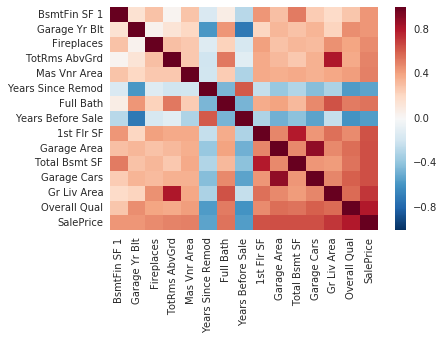

In [27]:
# we can also see these in a heatmap
heat = corr[corr > .4].index
heat_corrs = transform_df[heat].corr()
sns.heatmap(heat_corrs)

Both the heatmap and the table generally say the same thing, just visually different (though this is still important!). We can see which columns are useful here, and continue on now with dropping columns that are not much of use in terms of correlation.

In [28]:
# drop less than .4 columns (with SalePrice)
transform_df = transform_df.drop(corr[corr < 0.4].index, axis=1)

# confirm the change
transform_df.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,SalePrice,Years Before Sale,Years Since Remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,1080.0,GasA,Fa,Y,1656,1656,1,TA,7,Typ,2,1960.0,2.0,528.0,P,215000,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,882.0,GasA,TA,Y,896,896,1,TA,5,Typ,0,1961.0,1.0,730.0,Y,105000,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,1329.0,GasA,TA,Y,1329,1329,1,Gd,6,Typ,0,1958.0,1.0,312.0,Y,172000,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,2110.0,GasA,Ex,Y,2110,2110,2,Ex,8,Typ,2,1968.0,2.0,522.0,Y,244000,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,928.0,GasA,Gd,Y,928,1629,2,TA,6,Typ,1,1997.0,2.0,482.0,Y,189900,13,12


Looking at the documention, we now create a list of columns that we want to keep as categorical. This is based on intuition, and is more of an art than a science. These columns are:

In [29]:
# make list of categorical columns
nominal = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

Now we look at any columns that are numerical but are actually meant to be categorical. These are any of those columns that semantically mean stuff like "type 1", "type 2", etc.

Also, we'll want to look at any categorical columns that have a majority of its values as just 1 value. I.e. if 80% of an entire column has a value of "1", this may not have any predictive value. On the other hand, if we have hundreds of unique values, when we dummy code this column, hundreds of columns will need to be added back to the df. We can determine if it is best to remove columns such as these.

In [30]:
# get columns that we carried over / accounted for
transform_cat_cols = []
for col in nominal:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

# display list
transform_cat_cols

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

In [31]:
# get unique values in each cat column
unique = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
unique

Street           2
Central Air      2
Land Contour     4
Lot Config       5
Bldg Type        5
Roof Style       6
Foundation       6
Heating          6
MS Zoning        7
Condition 2      8
House Style      8
Roof Matl        8
Condition 1      9
Exterior 1st    16
Exterior 2nd    17
Neighborhood    28
dtype: int64

In [32]:
# aribtrary cutoff of 10 unique values to drop
drop_cols = unique[unique > 10].index
transform_df = transform_df.drop(drop_cols, axis=1)

# show progress
transform_df.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Roof Style,Roof Matl,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,SalePrice,Years Before Sale,Years Since Remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,Hip,CompShg,112.0,TA,TA,CBlock,639.0,1080.0,GasA,Fa,Y,1656,1656,1,TA,7,Typ,2,1960.0,2.0,528.0,P,215000,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,Gable,CompShg,0.0,TA,TA,CBlock,468.0,882.0,GasA,TA,Y,896,896,1,TA,5,Typ,0,1961.0,1.0,730.0,Y,105000,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,Hip,CompShg,108.0,TA,TA,CBlock,923.0,1329.0,GasA,TA,Y,1329,1329,1,Gd,6,Typ,0,1958.0,1.0,312.0,Y,172000,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,7,Hip,CompShg,0.0,Gd,TA,CBlock,1065.0,2110.0,GasA,Ex,Y,2110,2110,2,Ex,8,Typ,2,1968.0,2.0,522.0,Y,244000,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,Gable,CompShg,0.0,TA,TA,PConc,791.0,928.0,GasA,Gd,Y,928,1629,2,TA,6,Typ,1,1997.0,2.0,482.0,Y,189900,13,12


In [33]:
# get the remaining text columns and convert to categorical
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')
    
# create dummy columns and add back
transform_df = pd.concat([
    transform_df, 
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1)

# display results
transform_df.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Roof Style,Roof Matl,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,SalePrice,Years Before Sale,Years Since Remod,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,Hip,CompShg,112.0,TA,TA,CBlock,639.0,1080.0,GasA,Fa,Y,1656,1656,1,TA,7,Typ,2,1960.0,2.0,528.0,P,215000,50,50,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,Gable,CompShg,0.0,TA,TA,CBlock,468.0,882.0,GasA,TA,Y,896,896,1,TA,5,Typ,0,1961.0,1.0,730.0,Y,105000,49,49,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,Hip,CompShg,108.0,TA,TA,CBlock,923.0,1329.0,GasA,TA,Y,1329,1329,1,Gd,6,Typ,0,1958.0,1.0,312.0,Y,172000,52,52,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,7,Hip,CompShg,0.0,Gd,TA,CBlock,1065.0,2110.0,GasA,Ex,Y,2110,2110,2,Ex,8,Typ,2,1968.0,2.0,522.0,Y,244000,42,42,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,Gable,CompShg,0.0,TA,TA,PConc,791.0,928.0,GasA,Gd,

Our df looks much longer now, but all according to plan! Now we can finally update our select_features() function. We'll do the same as we did before, putting the new one below for better readability. 

We'll add two parameters: coefficient threshold and unique value count threshold. These are just the arbitrary numbers we chose in the code above. They can be changed to any number really, and this adds a little robustness. Per the cell below they will be the numbers we chose: 0.4 and 10 respectively.

In [34]:
# select features function - redone (make sure "transform_df" from code is relabeled as df)
def select_features(df, coeff_thresh=0.4, unique_thresh=10):
    # get numerical columns
    numerical_df = df.select_dtypes(include=['int', 'float'])
    
    # display some correlation coefficients
    corr = numerical_df.corr()['SalePrice'].abs().sort_values()
    
    # drop less than .4 columns (with SalePrice)
    df = df.drop(corr[corr < 0.4].index, axis=1)
    
    # make list of categorical columns
    nominal = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    # get columns that we carried over / accounted for
    transform_cat_cols = []
    for col in nominal:
        if col in df.columns:
            transform_cat_cols.append(col)
            
    # get unique values in each cat column
    unique = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    
    # aribtrary cutoff of 10 unique values to drop
    drop_cols = unique[unique > 10].index
    df = df.drop(drop_cols, axis=1)
    
    # get the remaining text columns and convert to categorical
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    
    # create dummy columns and add back
    df = pd.concat([
        df, 
        pd.get_dummies(df.select_dtypes(include=['category']))
    ], axis=1)
    
    
    return df  # we don't have to choose which columns to return anymore!

How about another test? (last rmse value: 55275.36731241307)

In [35]:
# test the data on the basic functions so far
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

# display rmse after first rendition of functions
rmse

33344.357171184485

Much better! We reduced the rmse significantly this time, almost in half. And the good news is there is still room for improvement. Lastly, we look at our train_and_test() function for the final part of the pipeline.

## Train and Test
The last thing we need to do is add a k parameter to our test_and_train() function. This will control the type of cross validation that occurs. After this, we can really optimize our RMSE returned value for the model.

The good news is we don't really have to do any more exploring! We'll just simply update the function below, with an added parameter for k method (holdout validation when k is 0, or cross validation with k folds when k is not 0.

In [36]:
# train and test function - redone
def train_and_test(df, k=0):
    # select only numeric (integer, float) columns to use using dtypes
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    
    # drop price from features since we want to predict it
    features = numeric_df.columns.drop("SalePrice")
    
    # create linear regression model and test it
    lr = linear_model.LinearRegression()
    
    # depending on k value...
    if k ==0:
        # allocate rows to train and test
        train = df[:1460]
        test = df[1460:]
        
        # perform testing
        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        
        # get mse and rmse values and return rmse
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)
    
        return rmse
    
    elif k == 1:
        # randomize rows from df for folds
        shuffle = df.sample(frac=1)
        
        # only 1 fold
        train = df[:1460]
        test = df[1460:]
        
        # perform testing one way
        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        
        # get mse1 and rmse1 values
        mse1 = mean_squared_error(test["SalePrice"], predictions)
        rmse1 = np.sqrt(mse1)
        
        # perform testing the other way
        lr.fit(test[features], test["SalePrice"])
        predictions = lr.predict(train[features])
        
        # get mse2 and rmse2 values
        mse2 = mean_squared_error(test["SalePrice"], predictions)
        rmse2 = np.sqrt(mse2)
        
        # get average rmse
        avg_rmse = np.mean([rmse1, rmse2])
        
        # return the average
        print(rmse1)
        print(rmse2)
        return avg_rmse
    
    else:
        # perform k splits and make rmses list
        kf = KFold(n_splits=k, shuffle=True)
        rmses = []
        
        # train and test each split respectively
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmses.append(rmse)
            
        # compute average rmse and return
        print(rmses)
        avg_rmse = np.mean(rmses)
        return avg_rmse

And drumroll for one last test (with a k=5)...

In [37]:
# test the data on the basic functions so far
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=5)

# display rmse after first rendition of functions
rmse

[27280.219744065584, 26108.28603851436, 27268.300652885515, 38806.42947918962, 26637.69365814271]


29220.18591455956

Voila! Our RMSE value decreased again, and could go even further with the optimal k value. Figuring this out is just simple trial and error, but it is objectively true that the improved function does indeed lower the error. 

## Further Analysis / Next Steps
While most of our work is done and we can't really do any additional analysis like in other projects besides fine-tuning our RMSE in our model, this doesn't mean that fine-tuning it isn't a bad thing. We'll outline a couple ways to do so here:

## Feature Engineering Iteration
Believe it or not, feature engineering on ML involving housing data is a very common thing! (Sarcasm of course, some may even say it is overdone) There are many ways to choose new features or connect existing ones that are universal across all types of housing data, and we can use this existing information to our advantage. 

We don't always have to be innovative to be optimal. In fact, perhaps counter-intuitively, sometimes being optimal means not being innovative. Sites like kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels) have pages like this where many different people have come together to realize what is optimal in terms of techniques for engineering features in terms of housing.

Even if we don't use these approaches exactly, we'll most likely be using its framework, and have the framework of previous successful models will definitely help.

## Feature Selection Improvement
We did a bit of work with feature selection in this project, and it seemed to work well, but we have nothing to compare it to. We chose some arbitrary cutoff points, and got a decreased RMSE, but how good is it? Not much if the average RMSE for this type of project is 100 (it's not, just an example). 

In order to test it, we should re-do and re-run the project with multiple feature selection types to see which one works best. You never really know until you've tried more than once! One of these techniques is to use categorical columns. A very quick quib about categorical columns in the first half of this blog: https://medium.com/@indreshbhattacharyya/feature-selection-categorical-feature-selection-boruta-light-gbm-chi-square-bf47e94e2558. 

There are always ways to improve on your model, even if it means just slightly adjusting your algorithm, It is very much an 'alive' process.

## Conclusion
With all of that said, we have a very nice basis so far for a good ML model involving linear regression. We had a model that picked out roughly 10 features given a 0.4 correlation coefficient threshhold (and lower than 10 unique values), and a pretty good RMSE given a k value for cross-fold validations. We can use this to (hopefully) accurately predict housing prices, but remember the model is domain specific in Ames, Iowa! 

While it is true that there are many improvements to be made, this will always be true. Machine Learning and Data Science is a lifelong journey, and as dragged out as that sounds, it is a fact. No model will ever be perfected forever, and constant tweaks will always have to be made as the times change.

This is not to fear if you just immerse yourself in the topic, however! By being involved in ML and the industry, you will just naturally pick up these improvements somewhat seemlessly in due time. 